In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# PCA

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
x = iris.data
y = iris.target

In [8]:
from sklearn.decomposition import PCA

## step 1. 開PCA機

In [9]:
pca = PCA(n_components=2) #壓到二維

## step 2.訓練

In [10]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## step 3.預測

In [11]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [12]:
X = pca.transform(x)

In [13]:
X[87]

array([ 0.81509524, -0.37203706])

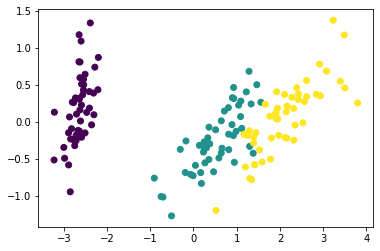

In [15]:
plt.scatter(X[:,0], X[:,1],c=y);

## 準備訓練/測試資料

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0 ) #百分之八十訓練 百分之二十當測試資料

### Step 1. 開SVC函數學習機

In [18]:
from sklearn.svm import SVC

In [22]:
clf = SVC(gamma='auto')

## step 2. 訓練

In [23]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step 3. 預測

In [24]:
y_predict = clf.predict(x_test)

In [25]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

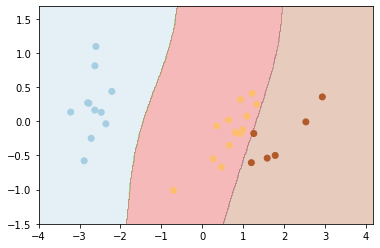

In [30]:
x0 = np.arange(-4, 4.2, 0.02)   #-4~4.2 range=0.02
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired');
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='Paired');

## K-Means 自動分類

In [31]:
x = np.random.rand(100,2)

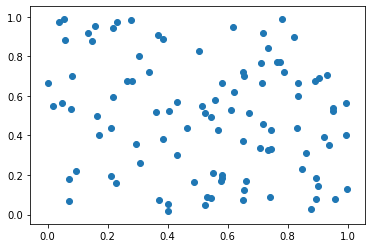

In [32]:
plt.scatter(x[:,0], x[:,1]);

## step 1. 打開 K-Means 學習機

In [34]:
from sklearn.cluster import KMeans

In [35]:
clf = KMeans(n_clusters=3) # 3維

## step 2. 學習

In [36]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## step 3. 預測

In [37]:
clf.predict(x) #預測答案

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0])

In [38]:
clf.labels_ #正確答案

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0])

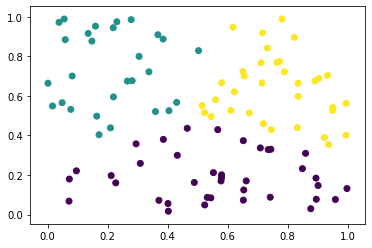

In [40]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_);

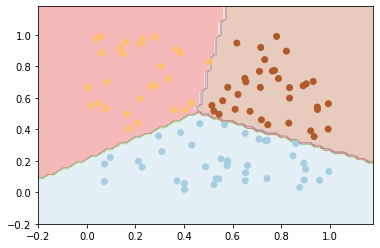

In [43]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired');
plt.scatter(x[:,0], x[:,1],c=clf.labels_, cmap='Paired');

## 'make_blobs' 生成更像真實世界的數據

In [45]:
from sklearn.datasets.samples_generator import make_blobs

In [53]:
x, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=0)

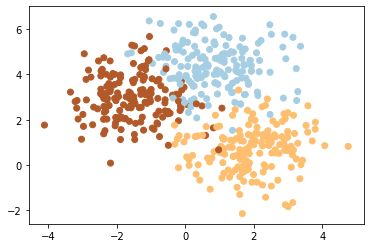

In [54]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired');

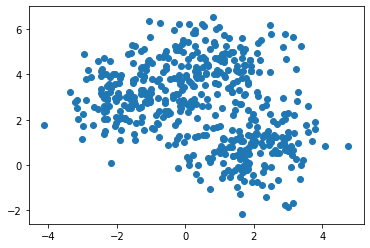

In [55]:
plt.scatter(x[:,0], x[:,1]);

## step 1. 打開 K-Means 函數學習機

In [57]:
clf = KMeans(n_clusters=3)

## step 2. 訓練

In [58]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## step 3.預測

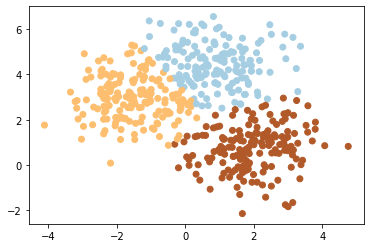

In [60]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap="Paired");

# Mean-Shifts 完全自動分類

## step 1. 打開函數學習機

In [61]:
from sklearn.cluster import MeanShift

In [62]:
clf = MeanShift()  #可以用 bandwidth=... 來進行調整

## step 2. 訓練

In [63]:
clf.fit(x)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

## step 3. 預測(結果)

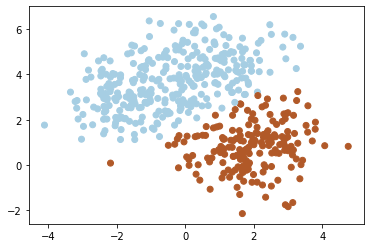

In [64]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired');

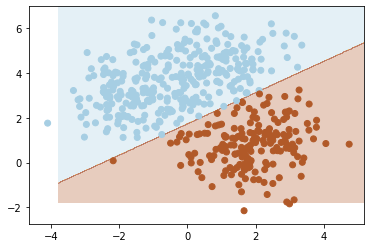

In [68]:
x0 = np.arange(-3.8, 5.2, 0.02)
y0 = np.arange(-1.8, 7, 0.02)

xm, ym = np.meshgrid(x0,y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired');
plt.scatter(x[:,0],x[:,1], c=clf.labels_, cmap='Paired');

## 'cross_val_score'

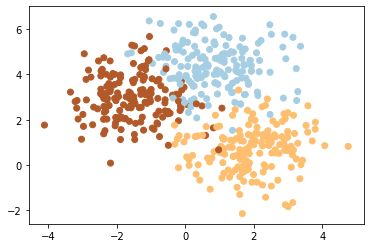

In [69]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired');

In [70]:
from sklearn.model_selection import cross_val_score

# SVC

In [71]:
from sklearn.svm import SVC

In [72]:
clf = SVC(gamma='auto')

In [73]:
scores = cross_val_score(clf, x, y, cv=5)

In [74]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [75]:
scores.max()

0.98989898989899

In [76]:
scores.min()

0.9090909090909091

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
clf = DecisionTreeClassifier()

In [80]:
scores = cross_val_score(clf, x, y, cv=5)

In [81]:
scores

array([0.92156863, 0.9009901 , 0.94949495, 0.91919192, 0.88888889])

In [83]:
scores.max()

0.9494949494949495

In [84]:
scores.mean()

0.9160268968073279

## Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
clf = RandomForestClassifier(n_estimators=100)

In [87]:
scores = cross_val_score(clf, x, y, cv=5)

In [88]:
scores

array([0.92156863, 0.92079208, 0.96969697, 0.87878788, 0.88888889])

In [89]:
scores.max()

0.9696969696969697

In [90]:
scores.mean()

0.9159468888065276